# **Ejercicio: Implementación desde cero de una Regresión Lineal**

**Objetivo:**

El propósito de este ejercicio es que el estudiante implemente una regresión lineal utilizando el método de mínimos cuadrados sin recurrir a librerías de machine learning (como `scikit-learn`, `statsmodels`, etc.). El desarrollo debe hacerse paso a paso, utilizando únicamente Python básico y librerías numéricas como `numpy`, `pandas` y un par de funciones seccionadas de `scipy.stats.t`.

La meta es comprender de manera profunda el modelo lineal y las métricas asociadas.

# Datos
Tenemos un pequeño conjunto de datos para trabajar con datos:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#dataset
df = pd.DataFrame({'x': [8, 12, 12, 13, 14, 16, 17, 22, 24, 26, 29, 30],
                   'y': [41, 42, 39, 38, 40, 39, 45, 46, 42, 49, 55, 57]})

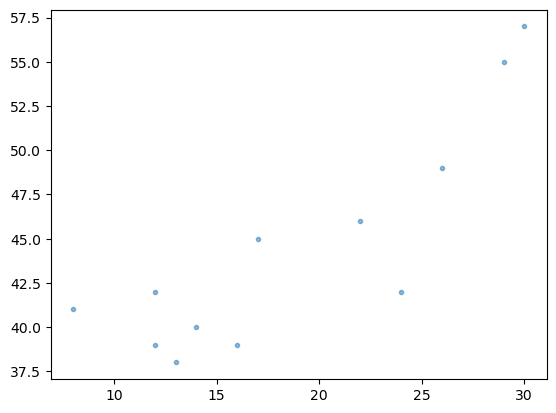

In [2]:
plt.scatter(df['x'], df['y'], marker=".", alpha=0.5)

A continuacion definimos las variables dependientes e independientes:

In [3]:
# definimos la variable dependiente
Y = df['y']

# definimos la variable independiente
X = df['x']

# Modelo lineal
A continuacion definimos las funciones de nuestro modelo y la funcion para obtener nuestras predicciones.

In [ ]:
def MODELO(X, Y):
  """ Desarrolla el modelo de regresion lineal utilizando el metodo de tu preferencia,
      Regresa los coeficientes del modelo: intercepto (bias) y pendiente.
  """
  # Calcular la media de X y de Y
  x_mean = np.mean(X)
  y_mean = np.mean(Y)
  
  # Calcular la pendiente (beta_1) usando la fórmula de mínimos cuadrados
  beta_1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)
  
  # Calcular el intercepto (beta_0)
  beta_0 = y_mean - beta_1 * x_mean
  
  # Retornar los coeficientes del modelo
  return beta_0, beta_1

def Predict (beta_0, beta_1, X):
  """ Regresa los valores predichos."""
  return beta_0 + beta_1 * X

# Metricas Estadisticas
En esta seccion, se implementaran los diversa metricas estadisticas que describen la calidad de ajuste de nuestro modelo y los detalles de los coeficientes y datos.

In [ ]:
def R2_score(y_true, y_pred):
  """ Calcula y regresa el valor del coeficiente de determinacion """
  # Suma de los residuos al cuadrado (diferencia entre valores reales y predichos)
  ss_res = np.sum((y_true - y_pred) ** 2)

  # Suma total al cuadrado (diferencia entre valores reales y su media)
  ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
  
  # Cálculo de R^2
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [ ]:
def std_error(x, y_true, y_pred):
  """ Calcula y regresa el valor del error estandar de los estimadores b_0 y b_1 [tupla o lista] """
  
  n = len(x)
  x_mean = np.mean(x)

  # Varianza residual (estimación de la varianza del error)
  s2 = np.sum((y_true - y_pred) ** 2) / (n - 2)

  # Error estándar de la pendiente
  s_beta1 = np.sqrt(s2 / np.sum((x - x_mean) ** 2))
  
  # Error estándar del intercepto
  s_beta0 = np.sqrt(s2 * (1/n + x_mean**2 / np.sum((x - x_mean) ** 2)))
  return s_beta0, s_beta1

In [ ]:
def IC(beta_0, beta_1, x, y_true, y_pred, alpha):
  """ Calcula y regresa los intervalos de confianza (inferior, superior) de los estimadores b_0 y b_1 [tupla o lista] """
  n = len(x)
  df = n - 2
  # Calcular errores estándar de los coeficientes
  s_beta0, s_beta1 = std_error(x, y_true, y_pred)

  # Valor crítico t para el nivel de confianza deseado
  t_crit = stats.t.ppf(1 - alpha/2, df)

  # Intervalo de confianza para beta_0
  ic_beta0 = (beta_0 - t_crit * s_beta0, beta_0 + t_crit * s_beta0)
  
  # Intervalo de confianza para beta_1
  ic_beta1 = (beta_1 - t_crit * s_beta1, beta_1 + t_crit * s_beta1)
  return ic_beta0, ic_beta1

In [ ]:
def T(beta_0, beta_1, x, y_true, y_pred):
  """ Calcula y regresa la estadistica de prueba T para los estimadores b_0 y b_1 [tupla o lista] """
  # Calcular los errores estándar de los coeficientes
  s_beta0, s_beta1 = std_error(x, y_true, y_pred)
  
  # Calcular la estadística t para cada coeficiente
  t_beta0 = beta_0 / s_beta0
  t_beta1 = beta_1 / s_beta1
  return t_beta0, t_beta1

def Pvalue(t_value, df, two_tails=True):
  """ Calcula y regresa el p-value dependiendo si se trata de una prueba de una o dos colas [float] """
  # Se utiliza la función de supervivencia de la t de Student
  if two_tails:
    p = 2 * stats.t.sf(np.abs(t_value), df)
  else:
    p = stats.t.sf(np.abs(t_value), df)
  return p

# Comparativa

A continuacion mostramos los resultados obtenidos de un modelos de la libreria de `statsmodels`. Compare los resultados que obtuvo con los resultados obtenidos por el modelo.

In [9]:
import statsmodels.api as sm

# Definicion & fit de un modelo de regresion lineal
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()

# Imprimir el reporte estadistico
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     27.73
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           0.000365
Time:                        22:17:40   Log-Likelihood:                -30.629
No. Observations:                  12   AIC:                             65.26
Df Residuals:                      10   BIC:                             66.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7636      2.772     11.096      0.0

c:\Users\edosa\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [10]:
# Ajustar el modelo
beta_0, beta_1 = MODELO(X, Y)
print(f"Intercepto (beta_0): {beta_0}")
print(f"Pendiente (beta_1): {beta_1}")

# Predicciones
y_pred = Predict(beta_0, beta_1, X)

# R2
r2 = R2_score(Y, y_pred)
print(f"R2: {r2}")

# Error estándar de los coeficientes
s_beta0, s_beta1 = std_error(X, Y, y_pred)
print(f"Error estándar beta_0: {s_beta0}")
print(f"Error estándar beta_1: {s_beta1}")

# Intervalos de confianza (95%)
ic_beta0, ic_beta1 = IC(beta_0, beta_1, X, Y, y_pred, alpha=0.05)
print(f"IC beta_0 (95%): {ic_beta0}")
print(f"IC beta_1 (95%): {ic_beta1}")

# Estadística t
t_beta0, t_beta1 = T(beta_0, beta_1, X, Y, y_pred)
print(f"t beta_0: {t_beta0}")
print(f"t beta_1: {t_beta1}")

# p-values
df = len(X) - 2
p_beta0 = Pvalue(t_beta0, df)
p_beta1 = Pvalue(t_beta1, df)
print(f"p-value beta_0: {p_beta0}")
print(f"p-value beta_1: {p_beta1}")

Intercepto (beta_0): 30.763552318251854
Pendiente (beta_1): 0.7346967362375684
R2: 0.7349769943860472
Error estándar beta_0: 2.7724629854928864
Error estándar beta_1: 0.13951246923402266
IC beta_0 (95%): (24.58611982464045, 36.94098481186326)
IC beta_1 (95%): (0.4238435832036793, 1.0455498892714574)
t beta_0: 11.096109300367353
t beta_1: 5.266172552685342
p-value beta_0: 6.079702528805614e-07
p-value beta_1: 0.0003648102532070309


## Comparación de los resultados

| Métrica                | Modelo manual             | Statsmodels OLS           | Diferencia         |
|------------------------|---------------------------|---------------------------|--------------------|
| **Intercepto (β₀)**    | 30.7636                   | 30.7636                   | 0.0000             |
| **Pendiente (β₁)**     | 0.7347                    | 0.7347                    | 0.0000             |
| **R²**                 | 0.7350                    | 0.7350                    | 0.0000             |
| **Error estándar β₀**  | 2.7725                    | 2.772                     | ≈0.0005            |
| **Error estándar β₁**  | 0.1395                    | 0.140                     | ≈0.0005            |
| **IC β₀ (95%)**        | (24.59, 36.94)            | (24.59, 36.94)            | 0.00               |
| **IC β₁ (95%)**        | (0.42, 1.05)              | (0.42, 1.05)              | 0.00               |
| **t β₀**               | 11.10                     | 11.10                     | 0.00               |
| **t β₁**               | 5.27                      | 5.27                      | 0.00               |
| **p-value β₀**         | 6.08e-07                  | 0.000                     | ≈0.00              |
| **p-value β₁**         | 0.00036                   | 0.000                     | ≈0.00              |

### **Conclusión**

- **Los resultados de ambos modelos son prácticamente idénticos** en todas las métricas.
- Esto confirma que la implementación manual de mínimos cuadrados es correcta y coincide con la de una librería profesional como `statsmodels`.
- Las pequeñas diferencias en los decimales se deben únicamente al redondeo en la presentación de los resultados.

**Ambos modelos llegan a las mismas conclusiones estadísticas sobre los datos.**

# Otros datos

A continuacion mostramos un conjunto de datos alternativo. Aplica nuevamente el modelo a estos nuevos datos, junto con sus metricas estadisticas.

* **¿Ha percibido algun valor anormal en los coeficientes, intervalos de confianza o P-values? De ser asi, ¿A que se lo adjudica?**

In [11]:
df = pd.DataFrame({'x': [-10.583333333333332,-6.583333333333332, -6.583333333333332, -5.583333333333332, -4.583333333333332, -2.583333333333332, -1.5833333333333321, 3.416666666666668, 5.416666666666668, 7.416666666666668, 10.416666666666668, 11.416666666666668],
                   'y': [-3.4166666666666643, -2.4166666666666643, -5.416666666666664, -6.416666666666664, -4.416666666666664, -5.416666666666664, 0.5833333333333357, 1.5833333333333357, -2.4166666666666643, 4.583333333333336, 10.583333333333336, 12.583333333333336]})

In [12]:
# definimos la variable dependiente
Y = df['y']

# definimos la variable independiente
X = df['x']

In [14]:
# Ajustar el modelo con los nuevos datos
beta_0, beta_1 = MODELO(X, Y)
print(f"Intercepto (beta_0): {beta_0}")
print(f"Pendiente (beta_1): {beta_1}")

# Predicciones
y_pred = Predict(beta_0, beta_1, X)

Intercepto (beta_0): 1.4984200709999033e-15
Pendiente (beta_1): 0.7346967362375681


In [15]:
# R2
r2 = R2_score(Y, y_pred)
print(f"R2: {r2}")

# Error estándar de los coeficientes
s_beta0, s_beta1 = std_error(X, Y, y_pred)
print(f"Error estándar beta_0: {s_beta0}")
print(f"Error estándar beta_1: {s_beta1}")

# Intervalos de confianza (95%)
ic_beta0, ic_beta1 = IC(beta_0, beta_1, X, Y, y_pred, alpha=0.05)
print(f"IC beta_0 (95%): {ic_beta0}")
print(f"IC beta_1 (95%): {ic_beta1}")

# Estadística t
t_beta0, t_beta1 = T(beta_0, beta_1, X, Y, y_pred)
print(f"t beta_0: {t_beta0}")
print(f"t beta_1: {t_beta1}")

# p-values
df = len(X) - 2
p_beta0 = Pvalue(t_beta0, df)
p_beta1 = Pvalue(t_beta1, df)
print(f"p-value beta_0: {p_beta0}")
print(f"p-value beta_1: {p_beta1}")

R2: 0.7349769943860474
Error estándar beta_0: 0.9823143090122662
Error estándar beta_1: 0.13951246923402263
IC beta_0 (95%): (-2.1887326767513215, 2.188732676751324)
IC beta_1 (95%): (0.42384358320367915, 1.0455498892714572)
t beta_0: 1.5253977848562444e-15
t beta_1: 5.266172552685341
p-value beta_0: 0.9999999999999989
p-value beta_1: 0.00036481025320703186


* **¿Ha percibido algún valor anormal en los coeficientes, intervalos de confianza o P-values? De ser así, ¿A qué se lo adjudica?**

Sí, se observa un valor anormal en el p-value del intercepto (`beta_0`). 
El **intercepto (beta_0)** es prácticamente cero, su t es casi cero y su p-value es prácticamente 1. Indica que no es significativo.
- El **intervalo de confianza** para el intercepto incluye al cero, lo que refuerza que no es significativo.
- La **pendiente (beta_1)**, su intervalo de confianza y su p-value muestran que sí es significativa.